In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# %matplotlib widget
%matplotlib inline

In [19]:
adv = pd.read_csv('../data/Advertising.csv', index_col=0)
adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Fig 3.1

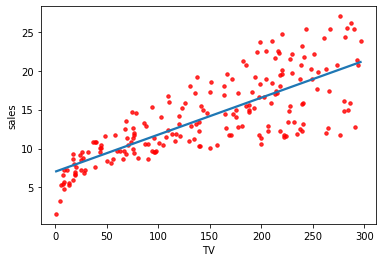

In [20]:
sns.regplot(x=adv.TV, y=adv.sales, ci=None, scatter_kws={'color':'r', 's':12});

### Fig 3.2

In [21]:
# linear regression of sales onto tv
X = adv.TV.values.reshape(-1, 1)
y = adv.sales
lr = LinearRegression()
lr.fit(X, y)
beta_0, beta_1 = lr.intercept_, lr.coef_[0]
print('beta0: {0:.3f} beta1:{1:.3f}'.format(beta_0, beta_1))

beta0: 7.033 beta1:0.048


In [22]:
# RSS
rss = ((adv.sales - lr.predict(adv.TV.values.reshape(-1, 1)))**2).sum()
print('The RSS of linear regression of sales onot tv is: ', rss)

The RSS of linear regression of sales onot tv is:  2102.5305831313512


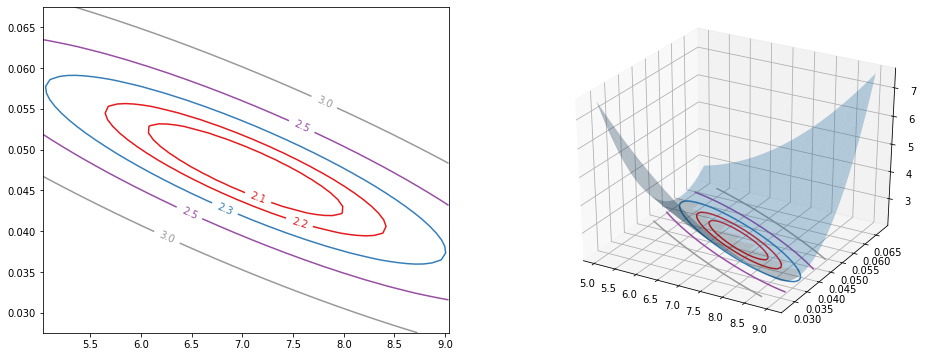

In [23]:
# contour plot of RSS vs. (beta0 & beta1)
b0 = np.linspace(beta_0 - 2, beta_0 + 2, 50) # shape (m, )
b1 = np.linspace(beta_1 - .02, beta_1 + .02, 50 ) # shape (n, )
xx, yy = np.meshgrid(b0, b1) # shape (n, m)
z = np.zeros_like(xx) # shape (n, m)
for (i, j) in np.ndindex(z.shape): # iterate row-major
    z[i, j] = ((y - (xx[i, j] + yy[i, j] * X.flat))**2).sum() / 1000

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
contours = ax[0].contour(xx, yy, z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax[0].clabel(contours, inline=True, fontsize=10, fmt='%1.1f')

ax[1] = plt.subplot(122, projection='3d')
ax[1].plot_surface(xx, yy, z, rstride=3, cstride=3, alpha=0.3)
ax[1].contour(xx, yy, z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3], zdir='z', offset=z.min())

plt.show();

### Fig 3.3

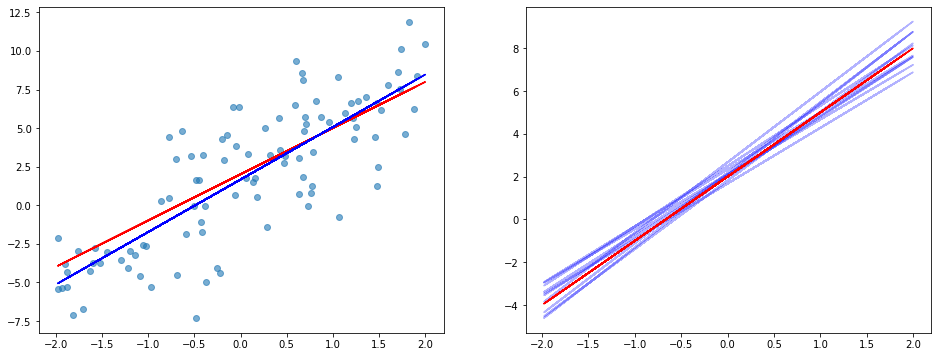

In [24]:
X = 4 * np.random.random_sample(100) - 2 # 100 samples from uniform dist. [-2, 2]
np.random.seed(42)
noise = 3 * np.random.randn(100) # N(0, 3)
Y = 2 + 3 * X 
f = Y + noise

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(X, f, alpha=0.6)
ax[0].plot(X, Y, 'r-')

lr = LinearRegression()
lr.fit(X.reshape(-1, 1), f)
f_hat = lr.predict(X.reshape(-1, 1))
ax[0].plot(X, f_hat, 'b-');

for i in range(10):
    f = Y + 3 * np.random.randn(100)
    lr.fit(X.reshape(-1, 1), f)
    f_hat = lr.predict(X.reshape(-1, 1))
    ax[1].plot(X, f_hat, 'b-', alpha=0.3);
ax[1].plot(X, Y, 'r-')
plt.show();

### Table 3.1 & 3.2

In [25]:
X = adv.TV.values
y = adv.sales.values
lr_sm = sm.OLS(y, sm.add_constant(X))
results = lr_sm.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 05 Dec 2020   Prob (F-statistic):           1.47e-42
Time:                        00:43:05   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In [26]:
# table 3.1
print(results.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
x1             0.0475      0.003     17.668      0.000       0.042       0.053


### Multiple Linear Regression

### Table 3.3 simple linear regression of sales onto radio and onto newspaper

In [27]:
# simple linear regression of sales onto radio and onto newspaper
X_radio = adv.radio
lr_radio = sm.OLS(y, sm.add_constant(X_radio))
rslts_radio = lr_radio.fit()

X_news = adv.newspaper
lr_news = sm.OLS(y, sm.add_constant(X_news))
rslts_news = lr_news.fit()

print(rslts_radio.summary().tables[1])
print(rslts_news.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087


### Table 3.4 multiple linear regression on advertising data

In [28]:
X = adv.iloc[:, :-1]
y = adv.sales
lr_adv = sm.OLS(y, sm.add_constant(X))
results = lr_adv.fit()
print(results.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011


In [29]:
print(results.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 05 Dec 2020   Prob (F-statistic):           1.58e-96
Time:                        00:43:05   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         


### Table 3.5 correlation matrix for the predictors

In [30]:
# TODO 

### Fig 3.5 3D plot of multiple regression

In [39]:
%matplotlib widget
X = adv.iloc[:, :-2]
y = adv.sales
lr = LinearRegression()
lr.fit(X, y) # X.shape = (n, 2)
xx = np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 50) # (50, )
yy = np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 45) # (45, )
xv, yv = np.meshgrid(xx, yy) # (45, 50)
X_test = np.array([xv.flatten(), yv.flatten()]).T # (45*55, 2)
z = lr.predict(X_test) #(45*55, 1)

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.plot(adv.TV, adv.radio, adv.sales, 'ro', alpha=0.5)
ax.plot_surface(xv, yv, z.reshape(45, 50), alpha=0.5)
ax.set_xlabel('tv')
ax.set_ylabel('radio')
ax.set_zlabel('sales')
# ax.view_init(65, 0)
plt.show();

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### credit card balance data set

In [3]:
credit = pd.read_csv('../data/Credit.csv', index_col=0)
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 37.5+ KB


In [5]:
credit.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


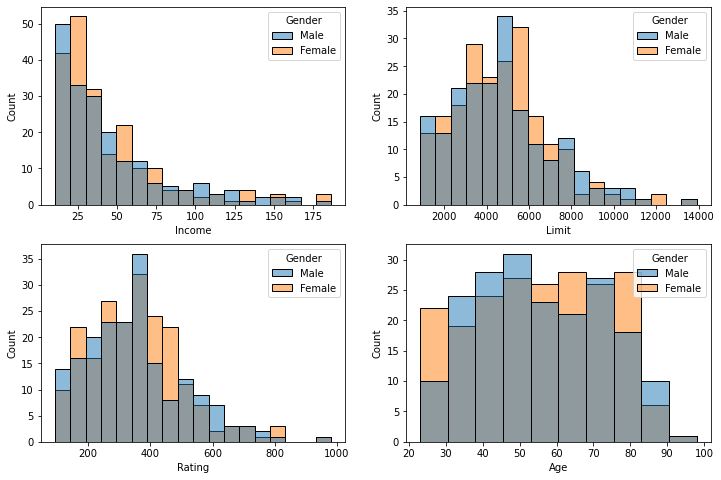

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(credit, x='Income', ax=ax[0, 0], hue='Gender')
sns.histplot(credit, x='Limit', ax=ax[0, 1], hue='Gender')
sns.histplot(credit, x='Rating', ax=ax[1, 0], hue='Gender')
sns.histplot(credit, x='Age', ax=ax[1, 1], hue='Gender')
plt.show();

### Fig 3.6 credit data set pairplots

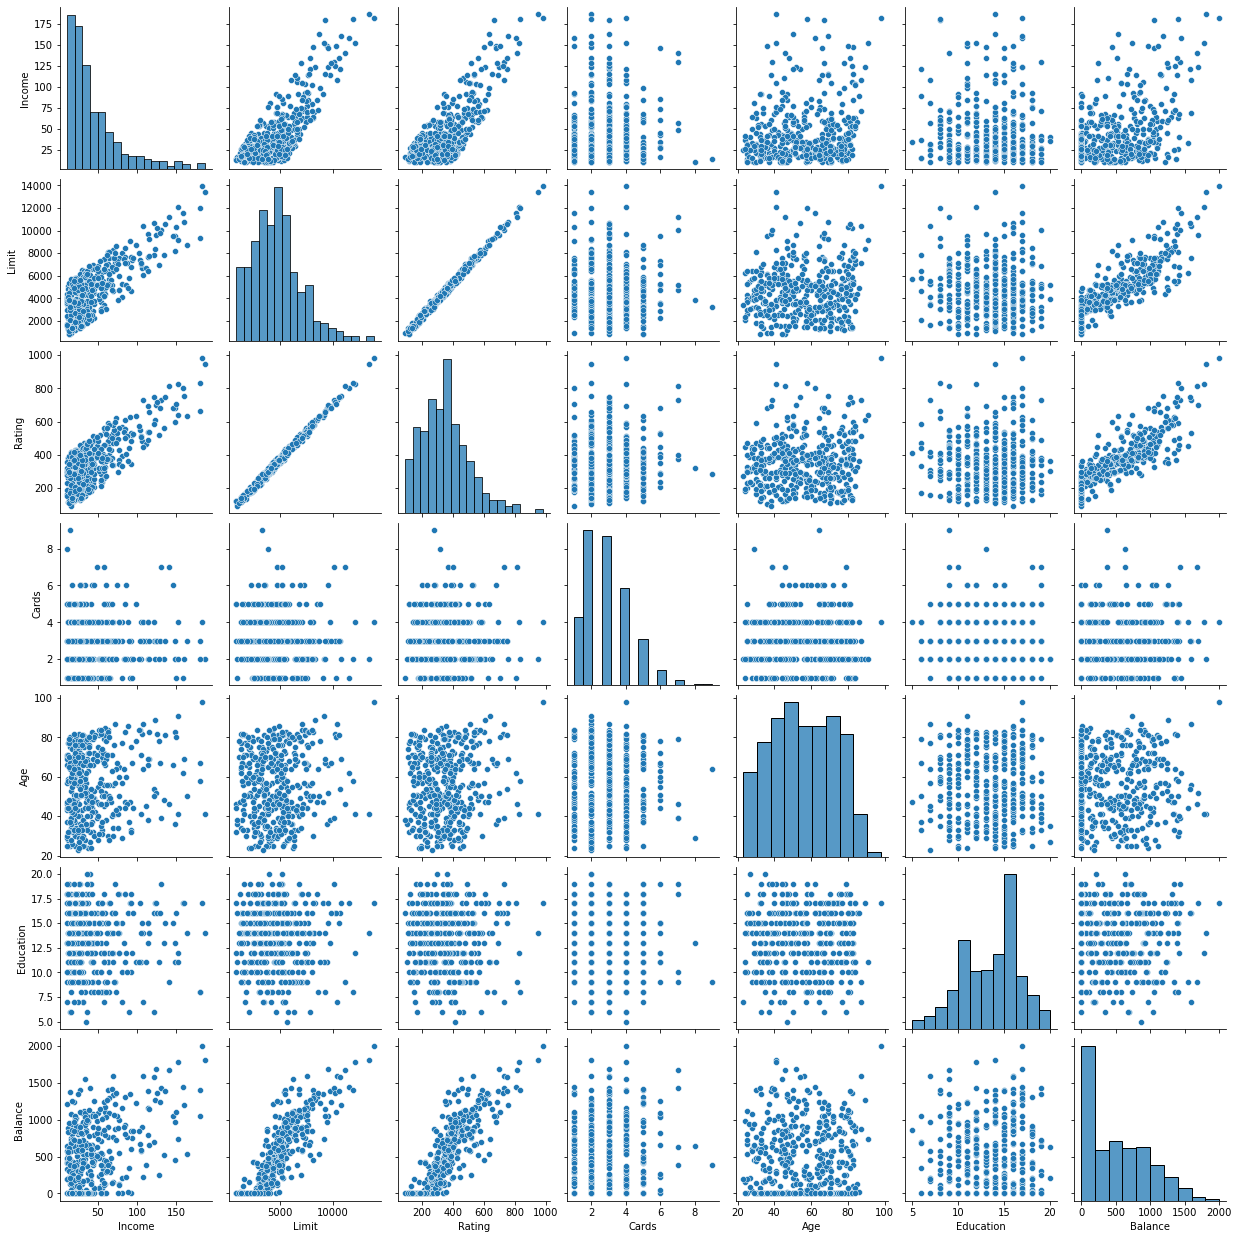

In [15]:
sns.pairplot(credit)

### Table 3.7 encoding of qualitative variables

In [24]:
# encode gender using a is_female dummy variable
# encode female as 1 and male as 0
credit['is_female'] = (credit['Gender'] == 'Female').astype('int')
X = credit.is_female
y = credit.Balance
sm_lr = sm.OLS(y, sm.add_constant(X))
results = sm_lr.fit()
print(results.summary().tables[1])
print('\n avg. male balance is: {0:.3f} and avg. female balance is: {1:.3f}'\
          .format(results.params[0], results.params[0] + results.params[1]))

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        509.8031     33.128     15.389      0.000     444.675     574.931
is_female     19.7331     46.051      0.429      0.669     -70.801     110.267

 avg. male balance is: 509.803 and avg. female balance is: 529.536


In [25]:
# encode gender using a is_female dummy variable
# now encode male as 1 and female as 0
credit['is_female'] = (credit['Gender'] == 'Male').astype('int')
X = credit.is_female
y = credit.Balance
sm_lr = sm.OLS(y, sm.add_constant(X))
results = sm_lr.fit()
print(results.summary().tables[1])
print('\n avg. male balance is: {0:.3f} and avg. female balance is: {1:.3f}'\
          .format(results.params[0] + results.params[1], results.params[0]))

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        529.5362     31.988     16.554      0.000     466.649     592.423
is_female    -19.7331     46.051     -0.429      0.669    -110.267      70.801

 avg. male balance is: 509.803 and avg. female balance is: 529.536
